# Análise exploratórica básica com Python


    
# Visão geral

Dataset gratuito "autos.csv". O dataset será utilizado sem modificações importantes.

Este projeto analisa os dados simulados sobre automóveis e suas características como preço, quilometragem, potência, tipo de câmbio entre outras informações que serão detalhadas na sequência.

# Objetivos

Demonstrar graficamente informações relevantes sobre a base de dados e responder as seguintes perguntas:

    1 - Qual a distribuição de veículos com base no ano de registro?
    2 - O que representam os outliers baseados no preço dos veículos?
    3 - Qual a quantidade veículos pertencentes por categoria?
    4 - Qual a quantidade veículos pertencentes por marca?
    5 - Qual o preço médio dos veículos com base no tipo de veículo e no tipo de caixa de câmbio?
    6 - Qual o preço médio dos veículos com base no tipo de combustível e no tipo de caixa de câmbio?
    7 - Qual a potência média de um veículo por tipo de veículo e tipo de caixa de câmbio?
    8 - Qual o preço médio de um veículo por marca, bem como tipo de veículo?
    

# Passo 1: carregamento e limpeza dos dados¶

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [2]:
# Dataset Base
clean_data_path = "\datasets\autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,golf,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,Other,125000,May,Diesel,audi,Yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,grand,125000,Aug,Diesel,jeep,Other,2016-03-14 00:00:00,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,golf,150000,Jul,Gasoline,volkswagen,No,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,fabia,90000,Jul,Diesel,skoda,No,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [4]:
df.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
313682,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Offer,0,control,Other,2005,manuell,0,colt,150000,Jul,Gasoline,mitsubishi,Yes,2016-03-21 00:00:00,2694,2016-03-21 10:42:49,2016,2016,March,March,0,10,11,5
313683,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Offer,2200,test,Other,2005,Unspecified,0,Other,20000,Jan,Other,sonstige_autos,Other,2016-03-14 00:00:00,39576,2016-04-06 00:46:52,2016,2016,March,March,23,0,11,11
313684,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Offer,1199,test,cabrio,2000,automatik,101,fortwo,125000,Mar,Gasoline,smart,No,2016-03-05 00:00:00,26135,2016-03-11 18:17:12,2016,2016,March,March,6,18,16,9
313685,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Offer,9200,test,bus,1996,manuell,102,transporter,150000,Mar,Diesel,volkswagen,No,2016-03-19 00:00:00,87439,2016-04-07 07:15:26,2016,2016,March,March,19,7,20,9
313686,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Offer,3400,test,kombi,2002,manuell,100,golf,150000,Jun,Diesel,volkswagen,Other,2016-03-20 00:00:00,40764,2016-03-24 12:45:21,2016,2016,March,March,4,12,14,6


In [5]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,postalCode,yearOfCreation,yearCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
count,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.0,313687.000000,313687.000000,313687.000000,313687.000000
mean,3902.961863,2001.909231,109.564250,131435.778340,50349.563597,2015.999930,2016.0,8.543274,11.834207,14.090769,6.235187
std,4168.150636,6.803211,191.741685,34963.149957,25765.545682,0.008374,0.0,8.511917,6.504730,6.803211,3.454766
min,0.000000,1910.000000,0.000000,5000.000000,1067.000000,2015.000000,2016.0,0.000000,0.000000,0.000000,1.000000
25%,999.000000,1998.000000,68.000000,125000.000000,29640.000000,2016.000000,2016.0,2.000000,7.000000,10.000000,3.000000
50%,2490.000000,2002.000000,104.000000,150000.000000,49205.000000,2016.000000,2016.0,6.000000,12.000000,14.000000,6.000000
75%,5400.000000,2006.000000,140.000000,150000.000000,70794.000000,2016.000000,2016.0,13.000000,17.000000,18.000000,9.000000
max,28800.000000,2016.000000,20000.000000,150000.000000,99998.000000,2016.000000,2016.0,384.000000,23.000000,106.000000,11.000000


# Passo 2: plotagem dos gráficos para responderem as 8 perguntas target.

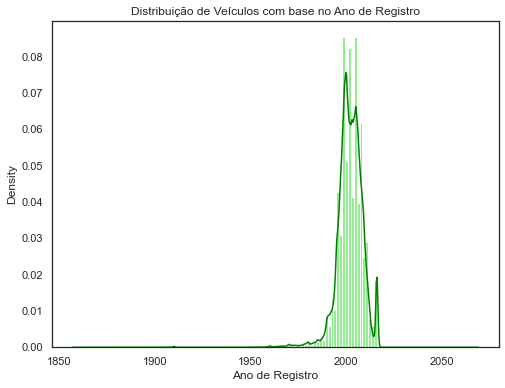

In [6]:
# Plot com a Distribuição de Veículos com base no Ano de Registro
# Gerando histograma
anoregistro = df.yearOfRegistration
fig, ax = plt.subplots(figsize=(8,6))
anoregistro.hist(density=True, bins = 70, histtype=u'bar', color = "lightgreen")
plt.xlabel("Ano de Registro")
plt.ylabel("Densidade")
plt.title("Distribuição de Veículos com base no Ano de Registro")

# Gerando KDE
ax = anoregistro.plot.kde(color='green')

Text(0.5, 1.0, 'Análise de outliers')

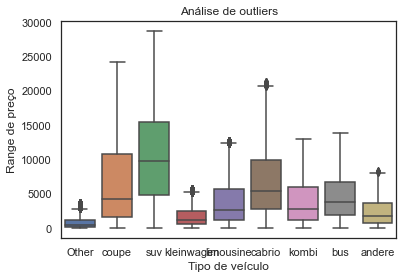

In [7]:
# Boxplot para avaliar os outliers
sns.boxplot(x=df.vehicleType, y=df.price)
plt.xlabel("Tipo de veículo")
plt.ylabel("Range de preço")
plt.title("Análise de outliers")

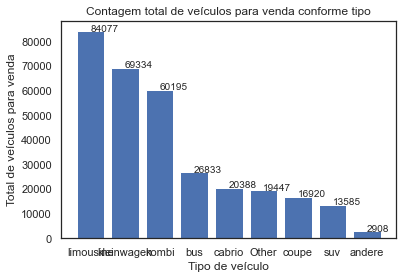

In [8]:
# Count Plot do número de veículos pertencentes a cada categoria 
# Data
qtdetipoveiculo = df.vehicleType.value_counts()
labels = qtdetipoveiculo.index
# Plot
fig, ax = plt.subplots()
plt.bar(labels, qtdetipoveiculo)

plt.xlabel("Tipo de veículo")
plt.ylabel("Total de veículos para venda")
plt.title("Contagem total de veículos para venda conforme tipo")

for index, value in enumerate(qtdetipoveiculo):
    plt.text(index, value, str(value))

plt.show()


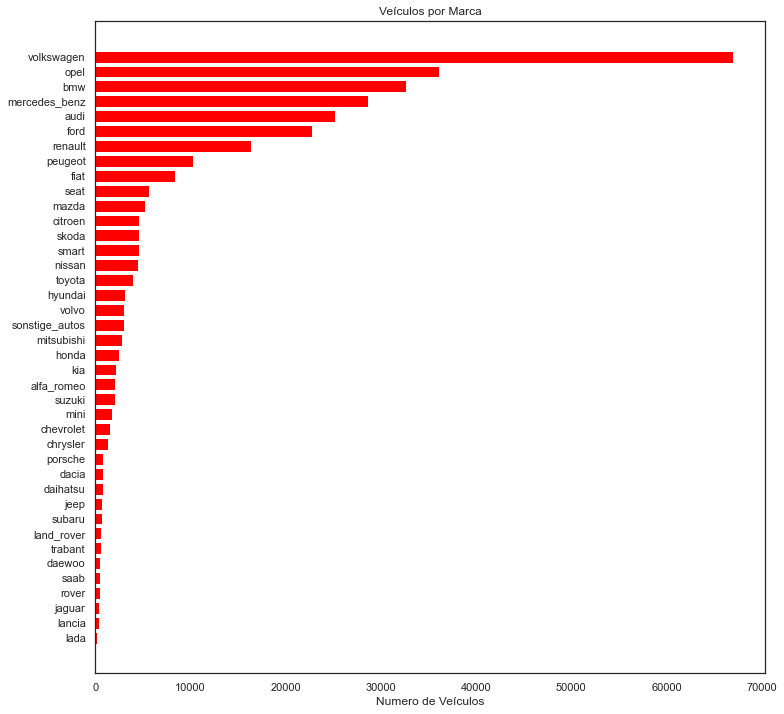

In [9]:
# Plot do número de veículos pertencentes a cada marca

# Data
qtdemarcaveiculo = df.brand.value_counts()
y_pos = np.arange(len(qtdemarcaveiculo.index))

# Plot
fig, ax = plt.subplots(figsize=(12,12))
ax.barh(y_pos, qtdemarcaveiculo, align='center', height=0.8, color='red')
ax.set_yticks(y_pos)
ax.set_yticklabels(qtdemarcaveiculo.index)
ax.invert_yaxis()
ax.set_xlabel('Numero de Veículos')
ax.set_title('Veículos por Marca')
plt.show()

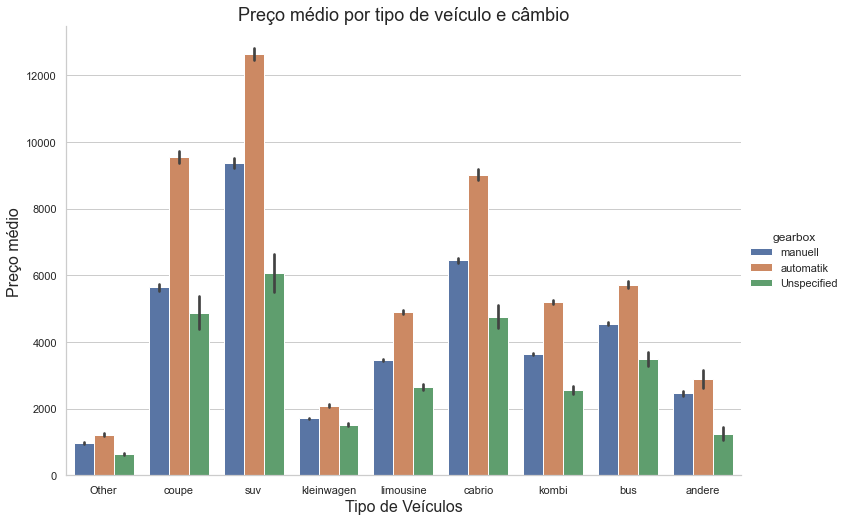

In [10]:
# Plot com o Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio
# Data
cardata = df.copy()[['vehicleType', 'gearbox', 'price']]

# Plot
sns.set_style("whitegrid")
g = sns.catplot(data=cardata, x="vehicleType", y="price", hue="gearbox", kind="bar", height=7, aspect=1.5)
g.ax.set_title("Preço médio por tipo de veículo e câmbio",fontdict={'size':18})
g.ax.xaxis.set_label_text("Tipo de Veículos",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Preço médio",fontdict= {'size':16})
plt.show()

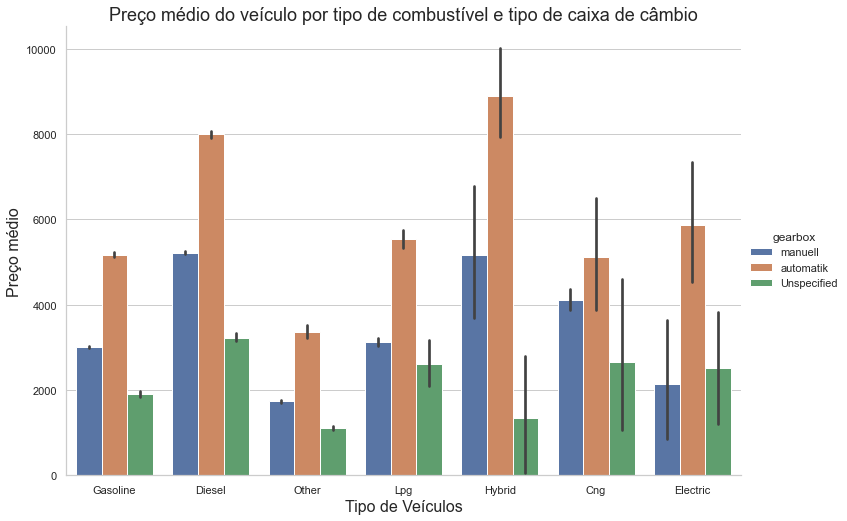

In [11]:
# Barplot com o Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio
# Data
cardata = df.copy()[['fuelType', 'gearbox', 'price']]

# Plot
sns.set_style("whitegrid")
g = sns.catplot(data=cardata, x="fuelType", y="price", hue="gearbox", kind="bar", height=7, aspect=1.5)
g.ax.set_title("Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio",fontdict={'size':18})
g.ax.xaxis.set_label_text("Tipo de Veículos",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Preço médio",fontdict= {'size':16})
plt.show()

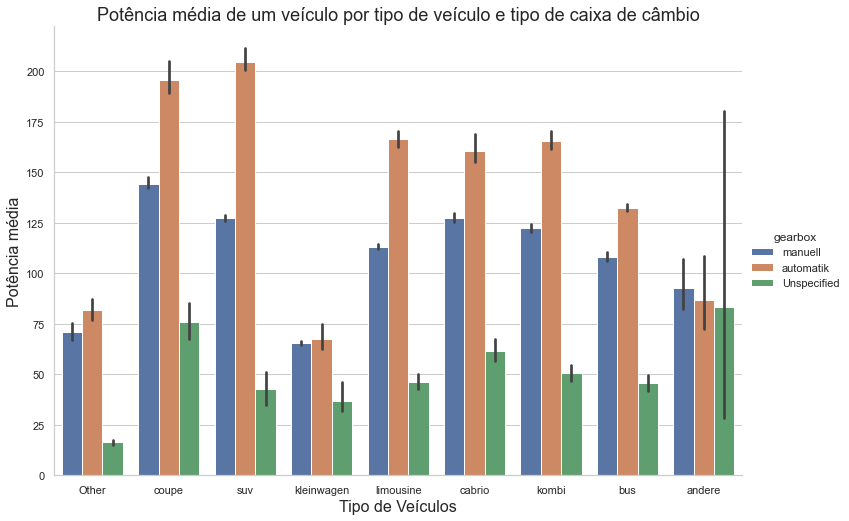

In [12]:
# Barplot com a Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio
# Data
powerdata = df.copy()[['vehicleType', 'gearbox', 'powerPS']]

# Plot
sns.set_style("whitegrid")
g = sns.catplot(data=powerdata, x="vehicleType", y="powerPS", hue="gearbox", kind="bar", height=7, aspect=1.5)
g.ax.set_title("Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio",fontdict={'size':18})
g.ax.xaxis.set_label_text("Tipo de Veículos",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Potência média",fontdict= {'size':16})
plt.show()

In [13]:
# A média de preço por marca e por veículo
# Data
df_copia = df.copy()[['price', 'brand', 'vehicleType']]
preco_marca = df_copia.groupby(['brand','vehicleType']).agg({'price':['mean']}).sort_values(('brand'), ascending=True)
preco_marca.head()

price
                               mean
brand      vehicleType             
alfa_romeo Other         669.805556
           andere        962.500000
           cabrio       7035.727778
           coupe        5265.458874
           kleinwagen   1867.865248

Text(219.453125, 0.5, 'Tipo de Veículo')

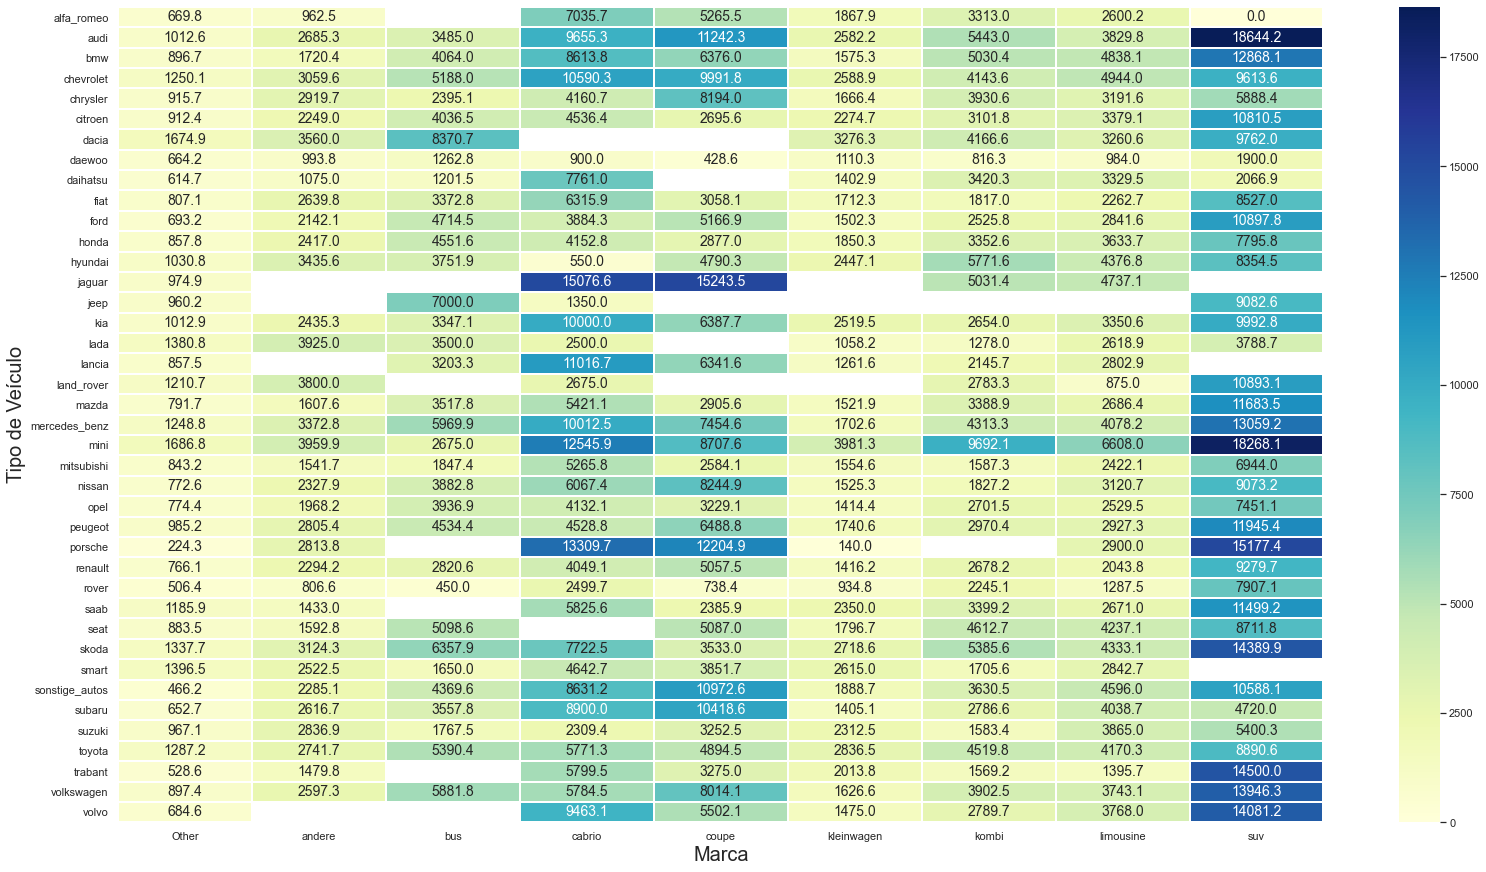

In [14]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo
# Data
df_copia2 = df.copy()[['price', 'brand', 'vehicleType']]

# Plot
pivot_preco = pd.pivot_table(data=df_copia2,
                    index='brand',
                    values='price',
                    columns='vehicleType')
pivot_preco.head()

fig, ax = plt.subplots(figsize=(27, 15))
p = sns.heatmap(pivot_preco,
                cmap="YlGnBu",
                annot=True,
                fmt=".1f",
                annot_kws={'size':14},
                linewidths=1,
                
                ax=ax)
plt.xlabel('Marca',fontdict= {'size':20})
plt.ylabel('Tipo de Veículo',fontdict= {'size':20})